#          MOTORCYCLE PRICE PREDICTION [LINEAR REGRESSION]

In [1]:
## Import Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [4]:
df=pd.read_csv('BIKE DETAILS.csv')


### Check the  info [shape,columns,rows] of the dataset...

In [10]:
## top 5 rows..

df.head()          

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [11]:
## bottom 5 rows..

df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [7]:
df.shape

(1061, 7)

In [8]:
total_rows, total_col = df.shape
print('Data:', total_rows)
print('Features:', total_col)

Data: 1061
Features: 7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## DATA ANALYSING

In [14]:
## numeric features

numeric_features = df.select_dtypes(include=np.number)
numeric_features.columns
numeric_features.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [15]:
## categorical features..

categorical_features = df.select_dtypes(include=object)
categorical_features.columns
categorical_features.describe()

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


## DATA COREELATION

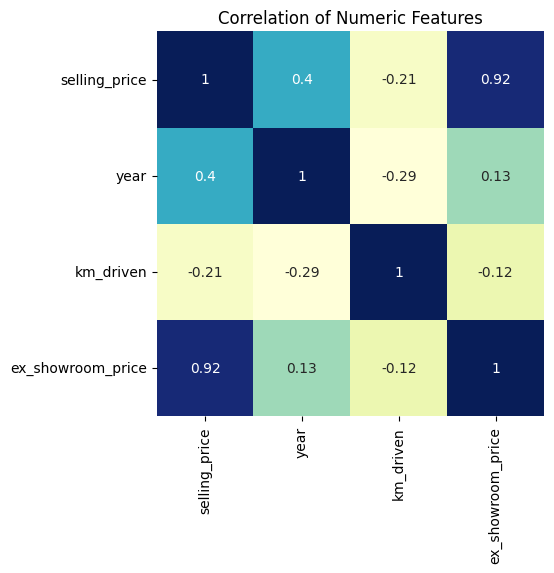

In [17]:
plt.figure(figsize=(5, 5))

sns.heatmap(df.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=False,
            cmap="YlGnBu",
            xticklabels=df.select_dtypes(np.number).columns,
            yticklabels=df.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

In [18]:
## INFERENCE:


## From te heatmap, it can be seen that the selling_price attribute has 3 different correlation, such as:

## ex_showroom_price: 0.92 (strong positive correlation)
## km_driven: -0.21 (weak negative correlation)
## year: -0. (weak positive correlation)

In [ ]:
## Next to compare more clearly between the selling_price attribute and the ex_showroom_price attribute because according
## to the heatmap result, every increase in ex_showroom_price attribute will effect the increase in the other variable which
##  is seeling_price attribute (positive correlation). So that it significantly forms a direction to the top right.

## correlation between selling_price & ex_showrrom_price attribute

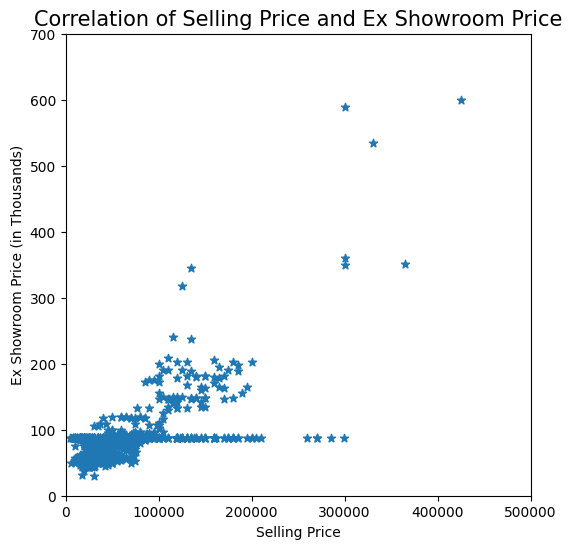

In [113]:
plt.figure(figsize=(6, 6))

plt.scatter(df['selling_price'], df['ex_showroom_price'], marker='*')
plt.title('Correlation of Selling Price and Ex Showroom Price', fontsize=15)
plt.xlabel('Selling Price')
plt.ylabel('Ex Showroom Price (in Thousands)')
plt.xlim(xmin=0, xmax=500000)
plt.ylim(ymin=0, ymax=700000 )
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.show()

In [22]:
## To compare more clearyly between the selling_price attribute and the km_driven attribute. 
## These two attributes have a weak negative which means that these two attributes are not very correlated so they
## don't actually form a significant pattern.

## correlation between selling_price,km_driven

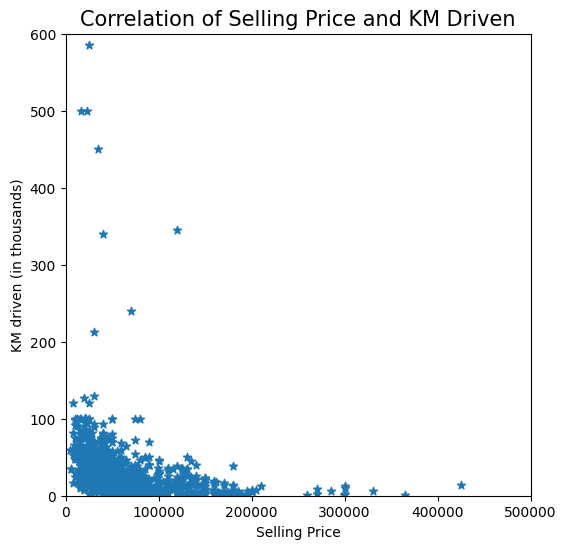

In [115]:
plt.figure(figsize=(6, 6))

plt.scatter(df['selling_price'], df['km_driven'], marker='*')
plt.title('Correlation of Selling Price and KM Driven', fontsize=15)
plt.xlabel('Selling Price')
plt.ylabel('KM driven (in thousands)')
plt.xlim(xmin=0, xmax=500000)
plt.ylim(ymin=0, ymax=600000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.show()

# DATA VISUALIZATION

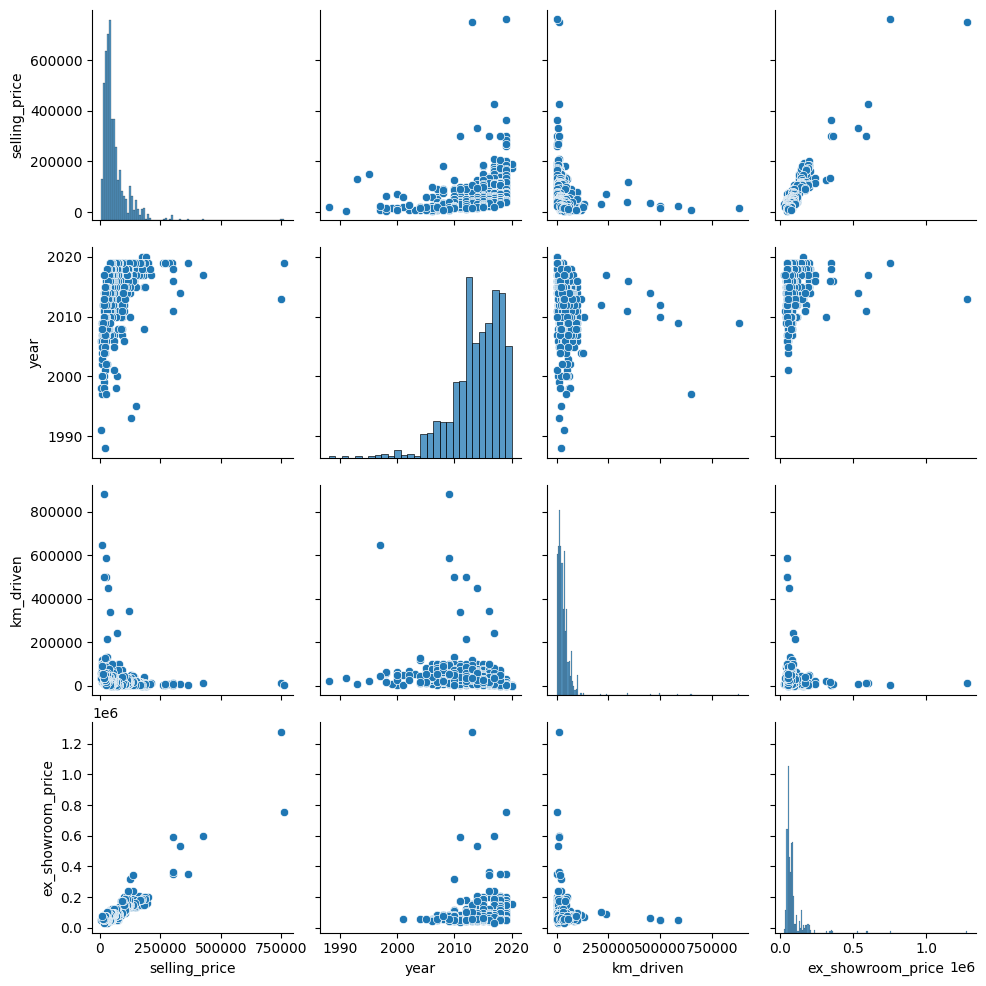

In [28]:
# Checking the distribution and correlation of each data

sns.pairplot(df);

In [ ]:
## From this attribute, it is known that the dealer only represent under 25 data, while the rest of the data is the individual..

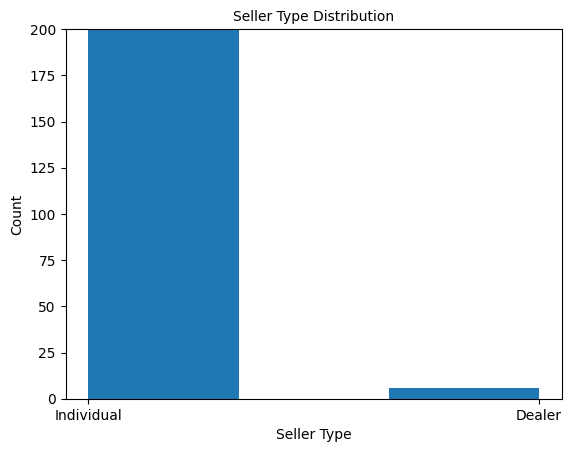

In [30]:
plt.figure()
plt.hist(df['seller_type'], bins=3)
plt.title('Seller Type Distribution', fontsize= 10)
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.ylim(ymax=200)
plt.show()

In [31]:
## Next for the owner_type attribute, there are values with the least ditribution of data starting from the 4th owner,
## 3rd owner, 2nd owner and finally the 1st owner with the most data.


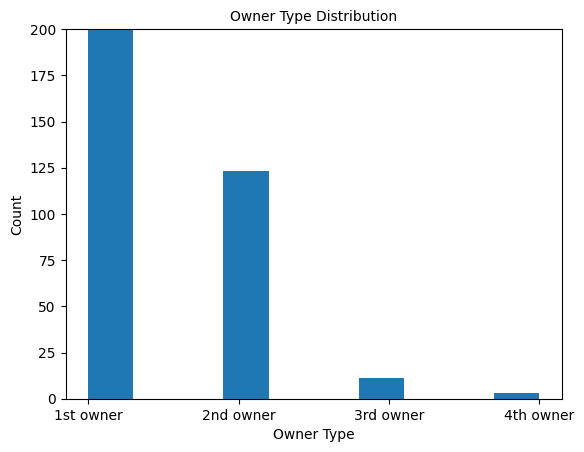

In [32]:
plt.figure()
plt.hist(df['owner'])
plt.title('Owner Type Distribution', fontsize= 10)
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.ylim(ymax=200)
plt.show()


## DATA PROCESSING

In [34]:
df.shape

(1061, 7)

### Handling Redundancy

In [39]:
if df.duplicated().sum() > 0:
    print('There is redundancy')
else:
    print('No redundancy')

There is redundancy


In [37]:
print('Duplicates', df.duplicated().sum())

Duplicates 6


### Removing Duplicates

In [38]:
data = df.drop_duplicates()
print('Duplicates : ', df.duplicated().sum())
print('Data :', df.shape[0])

Duplicates :  6
Data : 1061


### Handling Missing values

In [40]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [41]:
## The ex_showroom_price only having the missing values...

In [46]:
def check_null_percentage(df):
    col = df.isnull().sum().sort_values(ascending=False)
    percent = col / len(df)
    
    missing_data = pd.concat([col, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [45]:
check_null_percentage(df)

                   Total   Percent
ex_showroom_price    435  0.409991


In [47]:
## filling the null values using mean

df['ex_showroom_price'] = df['ex_showroom_price'].fillna(data['ex_showroom_price'].mean())
print('Missing values :', df.isnull().sum().sum())

Missing values : 0


In [48]:
### Now there is no any missing values in dataset..

### Handling Outliear

In [49]:
data_numeric = df.select_dtypes(include=np.number)

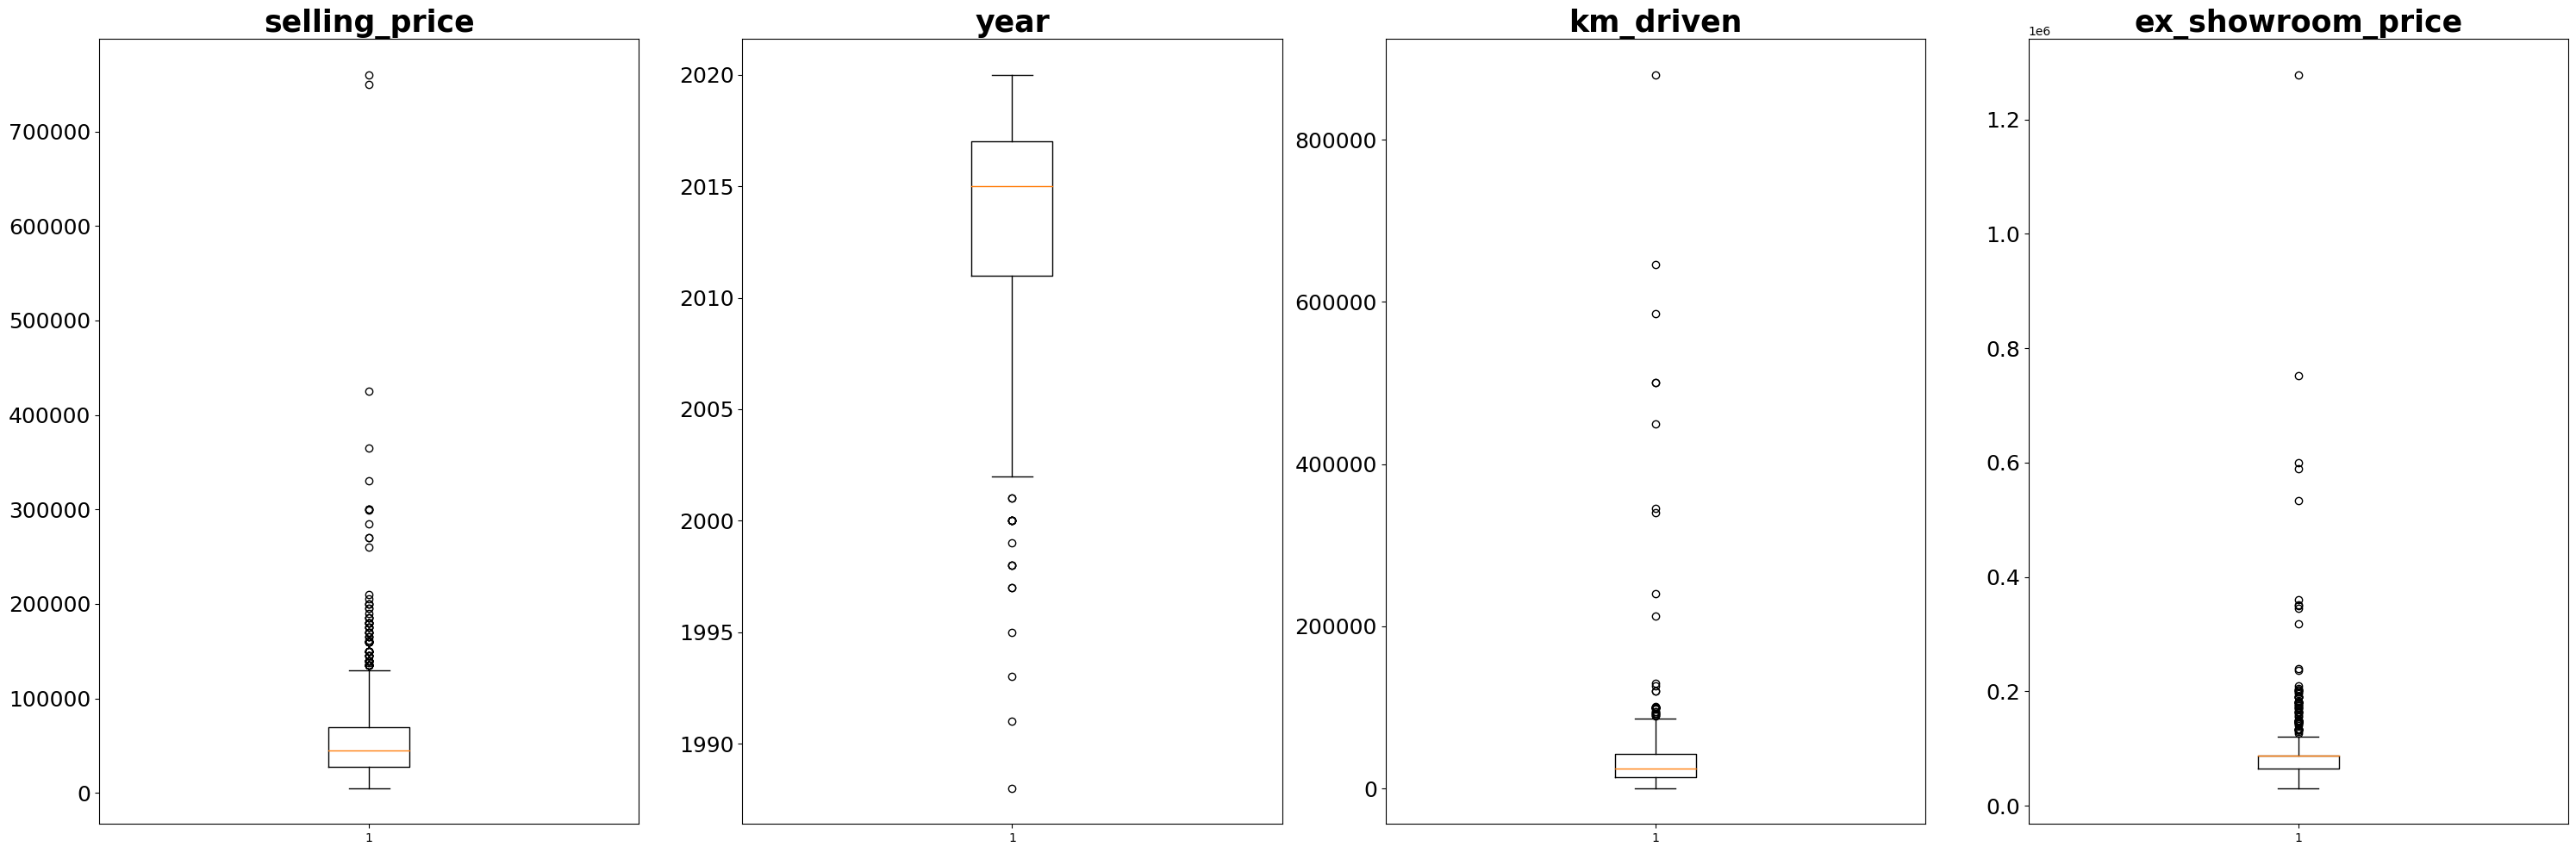

In [54]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(data_numeric.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data_numeric.iloc[:,i])
    ax.set_title(data_numeric.columns[i], fontsize=25, fontweight='bold')
    ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()

In [ ]:
def outliers(column):  
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr =  q3 - q1
    upper_range = q3 + (1.5 * iqr)
    lower_range = q1 - (1.5 * iqr)
    count_outlier = 0
for i in data[column]:
    if i < lower_range or i > upper_range:
        count_outlier += 1
return count_outlier

for col in data_numeric:
    print('Outlier from', col,':',outliers(col))

### Outlier from selling_price

In [71]:

q = df['selling_price'].quantile(0.97)
data = df[df['selling_price'] < q]

q

175000.0

### Outlier from km_driven



In [70]:
data = df[df['km_driven'] < 100000]
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,88060.794212
1,Honda Dio,45000,2017,Individual,1st owner,5650,88060.794212
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,88060.794212
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


### Outlier year


In [72]:
q = df['year'].quantile(0.01)
data = df[df['year'] > q]

q

2000.0

### Handling Categorical Features (Encode the label)


In [ ]:
data = pd.get_dummies(data, columns = ['owner', 'seller_type'], drop_first = True)


In [ ]:
data.drop(['name'], axis=1, inplace=True)

In [79]:

data.head()

,selling_price,year,km_driven,ex_showroom_price,owner_2nd owner,owner_3rd owner,owner_4th owner,seller_type_Individual
0,175000,2019,350,88060.794212,0,0,0,1
1,45000,2017,5650,88060.794212,0,0,0,1
2,150000,2018,12000,148114.000000,0,0,0,1
3,65000,2015,23000,89643.000000,0,0,0,1
4,20000,2011,21000,88060.794212,1,0,0,1


# DATA MODELLING

In [81]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

## Train & Test Split

In [83]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modelling

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Model 1: Linear Regression

In [92]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [98]:
regressor.score(X_train,y_train)

0.6946233632547636

In [100]:
y_pred=regressor.predict(X_test)

In [116]:
from numpy import math

In [109]:
print('Mean absolute Error:',math.sqrt(mean_absolute_error(y_test,y_pred_lr)))

Mean absolute Error: 137.97849898138213


In [117]:
print('Mean Squared Error:',math.sqrt(mean_squared_error(y_test,y_pred_lr)))

Mean Squared Error: 30706.350924733764
